In [6]:
#Imports 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carregando os dados 

iris = load_iris(as_frame=True)

In [3]:
#Split dos dados
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=0)

In [15]:
#Treinando o modelo e armazenando sua performance com o número de vizinho indo de 1 a 20 

#Pipelin para treinanmeto do modelo 

knn = Pipeline([
    ('scaler',StandardScaler())
    ,('knn',KNeighborsClassifier())
])


#Criando função para plotar o gráfico
def plot_accuracy_knn_neighbors(model_knn,range_neighbors,X_train,y_train,X_test,y_test):
    '''
        Plota a acurácia do modelo knn nos dados de treino e teste para diferentes número de vizihos.
    '''
    train_accuracy = {}
    test_accuracy = {}

    #Loop para treinanmeot do modelo 

    for neighbor in range_neighbors:
        model_knn.set_params(knn__n_neighbors = neighbor)
        model_knn.fit(X_train,y_train)
        train_accuracy[int(neighbor)] = knn.score(X_train,y_train)
        test_accuracy[int(neighbor)] = knn.score(X_test,y_test)

    #Plota o gráfico

    plt.title('Acurácia KNN x número de vizinhos')
    plt.plot(train_accuracy.keys(),train_accuracy.values(),label='Acurácia Treino')
    plt.plot(test_accuracy.keys(),test_accuracy.values(),label='Acurácia Teste')
    plt.legend()
    plt.xlabel("Número de vizinhos")
    plt.ylabel("Acurácia")
    return plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

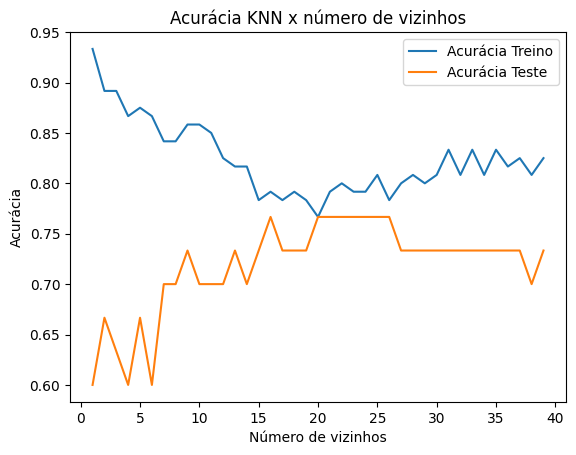

In [17]:

plot_accuracy_knn_neighbors(knn, np.arange(1,40),X_train,y_train,X_test,y_test)